In [1]:
import os, csv, ast
import numpy as np
import pandas as pd
from pandas import Series
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [2]:
#path = os.getcwd() + '/'
path = '/home/denten/Documents/papers/projects-academic/workbench/lit-mod-viz/char-agent/corpus/airport/'

In [3]:
# not resolving enteties here
# safe to just include the common character references
blacklist = ['t', 'vernon', 'bakersfeld', 'livingstone', 'freemantle', 
             'captain', 'lady', 'men', 'man', 'peter']

In [4]:
# read in the csv edge list
edge_tuples = []
with open(path + 'reports/06-actor-benefactor-edge-list.csv', 'r') as csvfile:
    srlreader = csv.reader(csvfile, delimiter=',')

    for row in srlreader:
        edge_tuples.append(row)

In [5]:
edge_counts = []
with open(path + 'reports/09-edge-counts.csv', 'r') as csvfile:
    srlreader = csv.reader(csvfile, delimiter=',')

    for row in srlreader:
        edge_counts.append(row)

In [6]:
total_edge_count = []
for i in edge_counts:
    total_edge_count.append(int(i[2]))

In [7]:
# parse out actors and benefactors
# we want to draw most common actors > most common benefactors
actors = []
benefactors = []

#for row in edge_tuples:
#    actors.append(row[0])
#    benefactors.append(row[1])
    
#actors = [a[0] for a in final_edge_tuples]
#benefactors = [b[1] for b in final_edge_tuples]

actors = [a[0] for a in edge_tuples]
benefactors = [b[1] for b in edge_tuples]

In [8]:
common_actors = Counter(actors).most_common()
common_benefactors = Counter(benefactors).most_common()

# create pandas data frame and fill in with individual
# debt ratios
actorsc = [a[0] for a in common_actors[0:25] if a[0] not in blacklist]
benefactorsc = [b[0] for b in common_benefactors[0:22] if b[0] not in blacklist]

In [9]:
# create a data frame for seaborn heatmap
df = pd.DataFrame(index=benefactorsc, columns=actorsc)

# give each axis a name
df.axes[0].rename('benefactors', inplace=True)
df.axes[1].rename('actors', inplace=True)

#df1 = pd.DataFrame(columns = ['actors', 'benefactors', 'debt'])
#df1.actors = [e[0][0] for e in edge_counts[0:40]]
#df1.benefactors = [e[0][1] for e in edge_counts[0:40]]

# an alternative way of creating df
# with pivots
#debt_values = []
#for e in edge_counts[0:100]:
#    abfreq = e[1]
#    for b in edge_counts:
#        bafreq = 0
#        if b[0][0] == e[0][1] and b[0][1] == e[0][0]:
#            bafreq = b[1]
#            break
#
#    cvalue = (abfreq - bafreq)/sum(total_edge_count)*100
#    debt_values.append(cvalue)
        
# df1.debt = [e[1] for e in edge_counts[0:40]]
# df1.debt = [debt_values]

In [19]:
print(sum(total_edge_count))

6487


In [17]:
# for df
for x in actorsc:
    for y in benefactorsc:
        xy_value = 0
        yx_value = 0
        
        for e in edge_counts:
            # mel, mel,248
            #     e00   e01     e1
            # look for a > b match
            # assume zero at the outset
            
            if x == e[0] and y == e[1]:
                xy_value = int(e[2])

            if y == e[0] and x == e[1]:
                yx_value = int(e[2])
            
        value = (xy_value - yx_value)/sum(total_edge_count)*100
        df.at[y,x] = value

[256, 126, 121, 107, 84, 73, 57, 51, 43, 41, 36, 34, 34, 30, 29, 27, 26, 23, 21, 18, 16, 16, 16, 16, 16, 16, 15, 15, 15, 14, 14, 14, 14, 13, 13, 13, 13, 13, 13, 12, 12, 12, 12, 12, 12, 12, 12, 11, 11, 11, 11, 11, 11, 11, 11, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3

[256, 126, 121, 107, 84, 73, 57, 51, 43, 41, 36, 34, 34, 30, 29, 27, 26, 23, 21, 18, 16, 16, 16, 16, 16, 16, 15, 15, 15, 14, 14, 14, 14, 13, 13, 13, 13, 13, 13, 12, 12, 12, 12, 12, 12, 12, 12, 11, 11, 11, 11, 11, 11, 11, 11, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [11]:
# fill in any NaN values with 0
df.fillna(0, inplace=True)

<bound method Artist.get_figure of <matplotlib.axes._subplots.AxesSubplot object at 0x7f1d811158d0>>

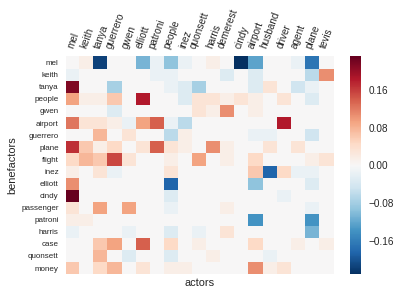

In [12]:
ax = sns.heatmap(df)
ax.xaxis.set_tick_params(labeltop=True, labelbottom=False, rotation=70, labelsize='10')
ax.yaxis.set_tick_params(labelsize='8', rotation=0)
ax.get_figure

In [13]:
# save data frame and graphic to disk
df.to_html(path + 'reports/91-dataframe.html')

In [14]:
fig = ax.get_figure()
fig.tight_layout()
fig.savefig(path + "graphs/91-output.png", dpi=600)

#savefig(fname, dpi=None, facecolor='w', edgecolor='w',
#    orientation='portrait', papertype=None, format=None,
#    transparent=False, bbox_inches=None, pad_inches=0.1,
#    frameon=None)